# Task: Mechanical Design Optimization

Objective: To build machine learning models for the optimization of mechanical design.

Description: Engineers use numerical models to analyze the behavior of a system. But when the models are too complex, the numerical simulation can last from a few hours to a few days. In addition, during the optimization process, one might need tens if not hundreds of trials. So in order to simplify the process, we need to build a simple surrogate model that yields similar results to the numerical one. We use machine learning model to build the surrogate model. 

Data: The dataset contains the data of about 6000 numerical simulations (finite element models, FEM).There are 9 input parameters and 4 output results. (https://www.kaggle.com/daalgi/fem-simulations)

Inputs (continuous and positive values): (1) load parameters: ecc, N, gammaG. (2) material parameters: Esoil, Econc. (3) geometry parameters: Dbot, H1, H2, H3.

Outputs (continuous values): (1) stress related results: Mr_t, Mt_t, Mr_c, Mt_c.

Build simple machine learning modeling using Python scikit-learn, Pandas, Numpy, and Seaborn.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
FILE = '5184doe.csv'

In [3]:
df_doe = pd.read_csv(FILE)
df_doe.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,1,0,2000,0.9,25,30000,17,0.8,1.0,0.8,0.082100,0.055648,0.082100,0.055648
1,2,10,2000,0.9,25,30000,17,0.8,1.0,0.8,-0.597084,-0.233470,1.160648,0.605016
2,3,18,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.094196,-0.566130,1.908188,0.947770
3,4,26,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.416485,-0.865039,2.844706,1.310545
4,5,0,2000,0.9,25,37000,17,0.8,1.0,0.8,0.079570,0.054213,0.079570,0.054213


In [4]:
df_doe.describe()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
count,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.00000,5184.000000,5184.000000,5184.000000,5184.000000
mean,2592.500000,13.500000,3500.000000,1.00000,50.000000,33500.000000,20.000000,1.20000,1.500000,1.20000,-1.629734,-0.810779,2.650433,1.518741
std,1496.636228,9.631609,1500.144697,0.10001,25.002412,3500.337626,2.449726,0.32663,0.408288,0.32663,1.426607,0.859657,2.475025,1.226075
min,1.000000,0.000000,2000.000000,0.90000,25.000000,30000.000000,17.000000,0.80000,1.000000,0.80000,-6.027412,-2.968574,0.024414,0.014080
25%,1296.750000,7.500000,2000.000000,0.90000,25.000000,30000.000000,17.000000,0.80000,1.000000,0.80000,-2.402849,-1.191169,0.251651,0.458440
50%,2592.500000,14.000000,3500.000000,1.00000,50.000000,33500.000000,20.000000,1.20000,1.500000,1.20000,-1.554450,-0.620024,2.138881,1.349318
75%,3888.250000,20.000000,5000.000000,1.10000,75.000000,37000.000000,23.000000,1.60000,2.000000,1.60000,-0.176328,0.018693,3.716968,2.413945
max,5184.000000,26.000000,5000.000000,1.10000,75.000000,37000.000000,23.000000,1.60000,2.000000,1.60000,0.251917,0.201895,9.408445,4.585227


In [5]:
# X and y for supervised learning
X = df_doe.drop(['Sample','Mr_t','Mt_t','Mr_c','Mt_c'],axis = 1)
y = df_doe[['Mr_t','Mt_t','Mr_c','Mt_c']]

In [6]:
X.head()

,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3
0,0,2000,0.9,25,30000,17,0.8,1.0,0.8
1,10,2000,0.9,25,30000,17,0.8,1.0,0.8
2,18,2000,0.9,25,30000,17,0.8,1.0,0.8
3,26,2000,0.9,25,30000,17,0.8,1.0,0.8
4,0,2000,0.9,25,37000,17,0.8,1.0,0.8


In [7]:
y.head()

,Mr_t,Mt_t,Mr_c,Mt_c
0,0.082100,0.055648,0.082100,0.055648
1,-0.597084,-0.233470,1.160648,0.605016
2,-1.094196,-0.566130,1.908188,0.947770
3,-1.416485,-0.865039,2.844706,1.310545
4,0.079570,0.054213,0.079570,0.054213


In [8]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y)

# Normalization

In [9]:
# Preprocessing & Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pre)
# Train and Test data before feature selection
X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yaotang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\yaotang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [10]:
y_train.head()

,Mr_t,Mt_t,Mr_c,Mt_c
1846,-2.775771,-1.443882,5.101661,2.559804
3147,-2.513065,-1.014094,2.077049,1.660574
488,0.102728,0.076276,0.102728,0.076276
1353,-0.980500,-0.164560,0.432389,0.847338
4428,0.202776,0.160705,0.202776,0.160705


Module to Plot Figure

In [11]:
def plot_result(y_test,y_pred):
    figure, axes = plt.subplots(2, 2,figsize = (10,10))
    
    row,col = 0, 0
    r2_00 = r2_score(y_test['Mr_t'], y_pred['Mr_t'])
    sns.regplot(x=y_test['Mr_t'],y = y_pred['Mr_t'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mr_t',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-5,-1,'R2 = {:3.3f}'.format(r2_00),fontsize = 16)
    
    row,col = 0, 1
    r2_01 = r2_score(y_test['Mt_t'], y_pred['Mt_t'])
    sns.regplot(x=y_test['Mt_t'],y = y_pred['Mt_t'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mt_t',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-2.5,-0.5,'R2 = {:3.3f}'.format(r2_01),fontsize = 16)
    
    row,col = 1, 0
    r2_10 = r2_score(y_test['Mr_c'], y_pred['Mr_c'])
    sns.regplot(x=y_test['Mr_c'],y = y_pred['Mr_c'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mr_c',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(1,7,'R2 = {:3.3f}'.format(r2_10),fontsize = 16)
    
    row,col = 1, 1
    r2_11 = r2_score(y_test['Mt_c'], y_pred['Mt_c'])
    sns.regplot(x=y_test['Mt_c'],y = y_pred['Mt_c'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Mt_c',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(-1,3,'R2 = {:3.3f}'.format(r2_11),fontsize = 16)
    

In [12]:
# plot_result(y_test,y_pred)

# Simple ML Regressors

### k-neighbors regression

score: 0.9490929588845437


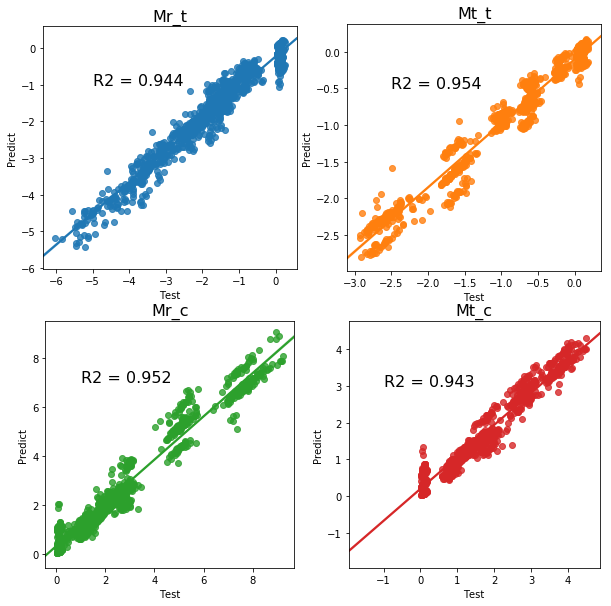

In [13]:
# k-neighbors regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(X_train,y_train)
print('score:', knr.score(X_test, y_test))
y_pred = pd.DataFrame(knr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)

score: 0.848556487311845


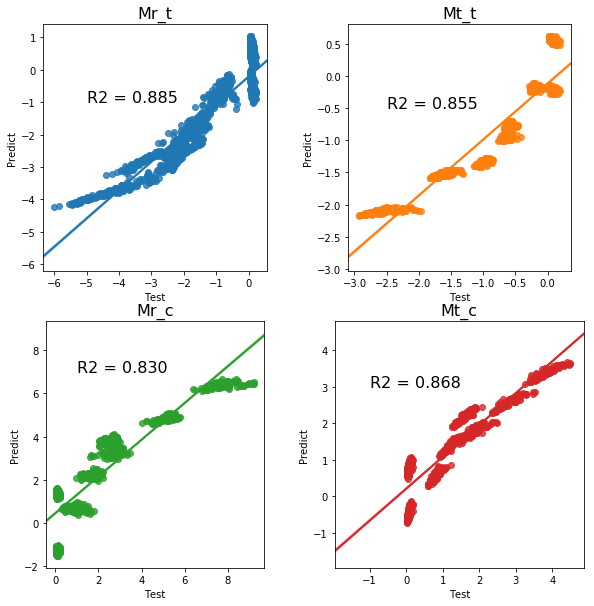

In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
print('score:', lr.score(X_test, y_test))
y_pred = pd.DataFrame(lr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)  

score: 0.848585602195443


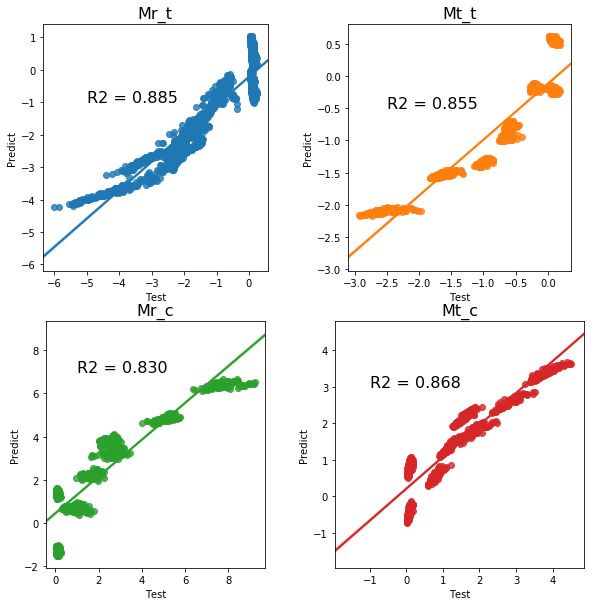

In [15]:
# Ridge regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5)

rr.fit(X_train,y_train)
print('score:', rr.score(X_test, y_test))
y_pred = pd.DataFrame(rr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)   

score: 0.8487555239417011


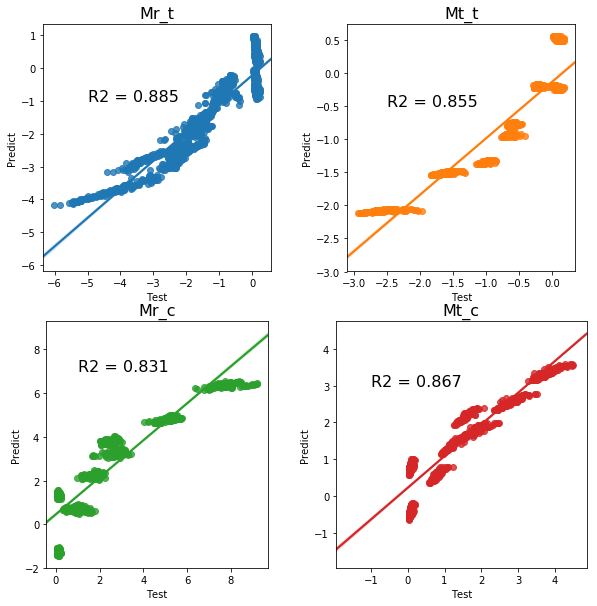

In [16]:
# Lasso
from sklearn.linear_model import Lasso
lsr = Lasso(alpha = 0.01, max_iter=10000)

lsr.fit(X_train,y_train)
print('score:', lsr.score(X_test, y_test))
y_pred = pd.DataFrame(lsr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)   

score: 0.9897245546077165


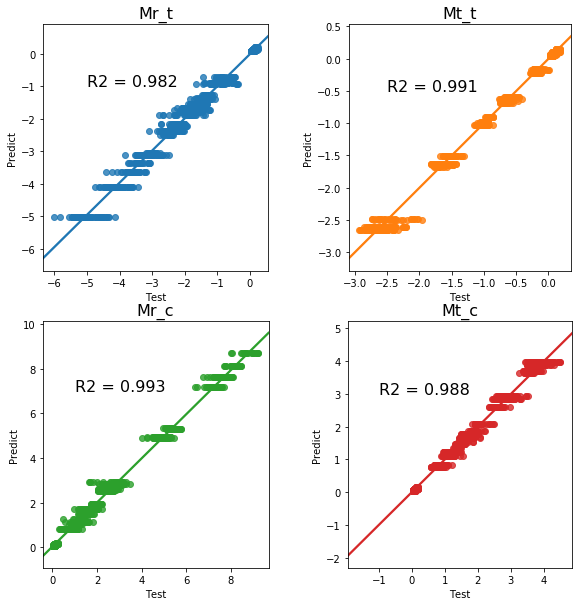

In [17]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 5)

dtr.fit(X_train,y_train)
print('score:', dtr.score(X_test, y_test))
y_pred = pd.DataFrame(dtr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred)    

score: 0.972473496408484


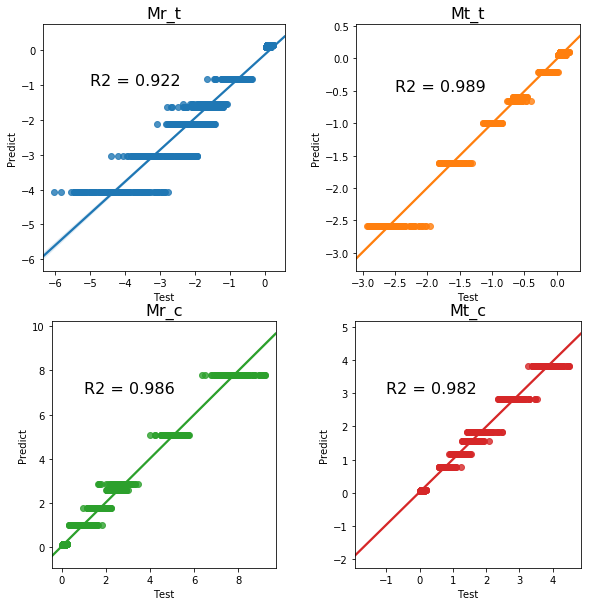

In [18]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=1000)

rfr.fit(X_train,y_train)
print('score:', rfr.score(X_test, y_test))
y_pred = pd.DataFrame(rfr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 

score: 0.848152052514076


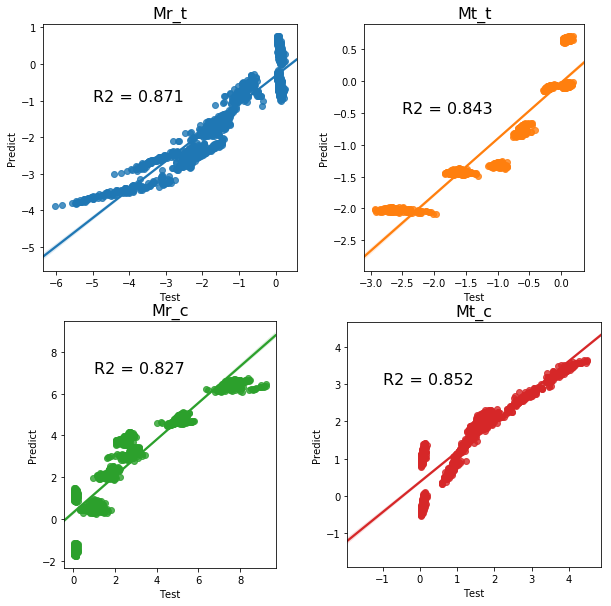

In [19]:
# Support Vector Machines
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
# svmr = SVR(gamma = 'scale',C = 1.0, epsilon = 0.2)

svmr = SVR(kernel='linear', gamma='auto')
mreg_svr = MultiOutputRegressor(svmr)

mreg_svr.fit(X_train,y_train)
print('score:', mreg_svr.score(X_test, y_test))
y_pred = pd.DataFrame(mreg_svr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 

score: 0.8594608352050139


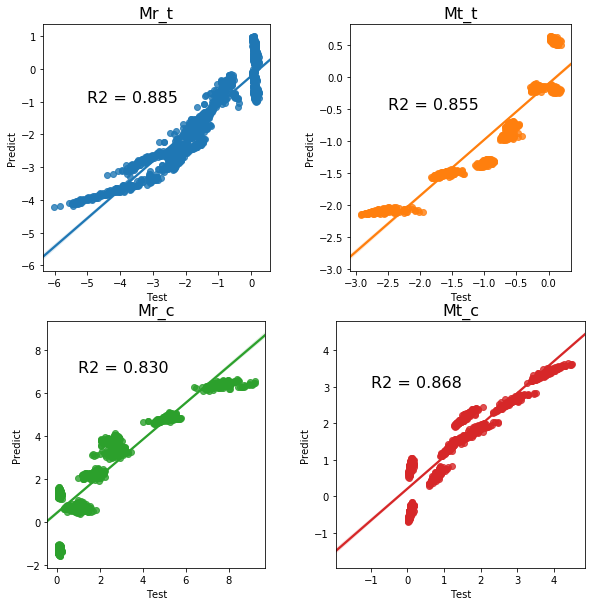

In [20]:
# stochastic gradient descent regressor
from sklearn import linear_model

sgdr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
mreg_sgdr = MultiOutputRegressor(sgdr)

mreg_sgdr.fit(X_train,y_train)
print('score:', mreg_sgdr.score(X_test, y_test))
y_pred = pd.DataFrame(mreg_sgdr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 

score: 0.9931514881358313


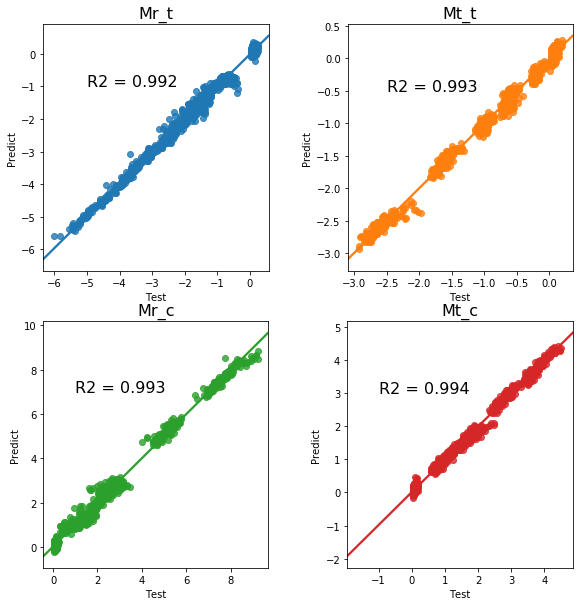

In [21]:
# Shallow Neural Networks
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor()

mlpr.fit(X_train,y_train)
print('score:', mlpr.score(X_test, y_test))
y_pred = pd.DataFrame(mlpr.predict(X_test), columns = ['Mr_t','Mt_t','Mr_c','Mt_c'])
plot_result(y_test,y_pred) 